In [2]:
import pandas as pd
import pandas as pd
import numpy as np 
import os

In [3]:
data_folder = 'ml-100k/'

simply_cols = ['index', 'name', 'num_children']
simply_df = pd.read_csv(os.path.join(data_folder, 'u.simply'), 
                        names=simply_cols)

In [7]:
data_folder = 'ml-100k/'
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(os.path.join(data_folder, 'u.data'), 
                        sep='\t', 
                        names=r_cols)

In [8]:
#Remove timestamp column as it's not needed for analysis
ratings_df = ratings_df.drop(columns=['timestamp'])
print("\n--- RATINGS DataFrame (ratings_df) ---")
print("First 5 Rows:")
print(ratings_df.head())





--- RATINGS DataFrame (ratings_df) ---
First 5 Rows:
   user_id  movie_id  rating
0      196       242       3
1      186       302       3
2       22       377       1
3      244        51       2
4      166       346       1


In [9]:
#Count duplicate ratings
duplicate_ratings = ratings_df.duplicated(subset=['user_id', 'movie_id'])
duplicate_ratings
print("Duplicate Ratings Count:", duplicate_ratings.sum())

Duplicate Ratings Count: 0


In [10]:
full_cols = ['movie_id', 'title' , 'release date', 'video release date',
        'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
        "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
        'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western']
movies_full_df = pd.read_csv(os.path.join(data_folder, 'u.item'), 
						sep='|', 
						names=full_cols, 
						encoding='latin-1')

# Remove unnecessary columns for full movie details
movies_full_df = movies_full_df.drop(columns=[ 'video release date', 'IMDb URL'])
movies_full_df.head()





,movie_id,title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
#Find duplicate movie titles
duplicate_movies = movies_full_df.duplicated(subset=['title'], keep=False)
movies_full_df[duplicate_movies].sort_values('title').head()



,movie_id,title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
669,670,Body Snatchers (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
572,573,Body Snatchers (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1649,1650,"Butcher Boy, The (1998)",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644,1645,"Butcher Boy, The (1998)",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1233,1234,Chairman of the Board (1998),01-Jan-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#strip year from movie titles
movies_full_df['title'] = movies_full_df['title'].str.replace(r'\s\(\d{4}\)$', '', regex=True)

In [13]:
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_df = pd.read_csv(os.path.join(data_folder, 'u.user'), 
                      sep='|', 
                      names=u_cols, 
                      encoding='latin-1')

users_df.drop(columns=['zip_code'], inplace = True)


In [14]:
users_df.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [15]:
#Changed none to unemployed
users_df['occupation'].replace('none', 'unemployed')

#Print unemployed count
print("\nCount of unemployed users:")
users_df['occupation'].value_counts()


Count of unemployed users:


occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64

In [16]:
movies_full_df

,movie_id,title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
id_counts = movies_full_df.groupby('title')['movie_id'].nunique()
duplicates = id_counts[id_counts > 1]

In [18]:

print("\nMovies with Duplicate IDs:")
print(duplicates)


Movies with Duplicate IDs:
title
Body Snatchers             2
Butcher Boy, The           2
Cape Fear                  2
Chairman of the Board      2
Chasing Amy                2
Deceiver                   2
Designated Mourner, The    2
Desperate Measures         2
Fly Away Home              2
Hugo Pool                  2
Hurricane Streets          2
Ice Storm, The             2
Kull the Conqueror         2
Money Talks                2
Nightwatch                 2
Sabrina                    2
Scarlet Letter, The        2
Shall We Dance?            2
Sliding Doors              2
Substance of Fire, The     2
That Darn Cat!             3
Ulee's Gold                2
Name: movie_id, dtype: int64


In [19]:
movies_full_df['is_title_duplicate'] = movies_full_df.duplicated(subset=['title'], keep=False)


In [20]:
movies_full_df[movies_full_df['is_title_duplicate']].sort_values(by='title').head()

,movie_id,title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,is_title_duplicate
669,670,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,True
572,573,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,True
1644,1645,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1649,1650,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
217,218,Cape Fear,01-Jan-1991,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,True


In [21]:
duplicate_info = movies_full_df[movies_full_df['title'].isin(duplicates.index)]
duplicate_info.sort_values(by=['title', 'movie_id']).head()

,movie_id,title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,is_title_duplicate
572,573,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,True
669,670,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,True
1644,1645,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1649,1650,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
217,218,Cape Fear,01-Jan-1991,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,True


In [22]:
rating_counts = ratings_df.groupby('movie_id').size().reset_index(name='rating_count')
rating_counts

,movie_id,rating_count
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [23]:
duplicate_rating_count = pd.merge(duplicate_info, rating_counts, on='movie_id')

#drop unnecessary columns temporarily
duplicate_rating_count = duplicate_rating_count.drop(columns=['release date', 'unknown', 'Action', 'Adventure', 'Animation',
	   "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
	   'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
	   'Thriller', 'War', 'Western'])

duplicate_rating_count.sort_values(by=['title', 'movie_id']).head(8)

,movie_id,title,is_title_duplicate,rating_count
15,573,Body Snatchers,True,33
16,670,Body Snatchers,True,36
40,1645,"Butcher Boy, The",True,1
41,1650,"Butcher Boy, The",True,1
0,218,Cape Fear,True,171
17,673,Cape Fear,True,86
26,1234,Chairman of the Board,True,8
42,1654,Chairman of the Board,True,1


In [24]:
winner_indices = duplicate_rating_count.groupby('title')['rating_count'].idxmax()
winner_indices.sort_values()

title
Cape Fear                   0
Shall We Dance?             2
Kull the Conqueror          3
Chasing Amy                 4
Sabrina                     5
Ulee's Gold                 7
Fly Away Home               8
Ice Storm, The              9
Deceiver                   10
Desperate Measures         11
Body Snatchers             16
Money Talks                21
That Darn Cat!             22
Hugo Pool                  25
Chairman of the Board      26
Designated Mourner, The    28
Hurricane Streets          30
Sliding Doors              31
Scarlet Letter, The        32
Nightwatch                 34
Butcher Boy, The           40
Substance of Fire, The     43
Name: rating_count, dtype: int64

In [25]:
canonical_df = duplicate_rating_count.loc[winner_indices].copy()
canonical_df

,movie_id,title,is_title_duplicate,rating_count
16,670,Body Snatchers,True,36
40,1645,"Butcher Boy, The",True,1
0,218,Cape Fear,True,171
26,1234,Chairman of the Board,True,8
4,268,Chasing Amy,True,255
10,309,Deceiver,True,28
28,1257,"Designated Mourner, The",True,4
11,329,Desperate Measures,True,45
8,304,Fly Away Home,True,149
25,1175,Hugo Pool,True,5


In [26]:
canonical_df = canonical_df[['title','movie_id']].rename(columns={'movie_id':'canonical_movie_id'})
canonical_df

,title,canonical_movie_id
16,Body Snatchers,670
40,"Butcher Boy, The",1645
0,Cape Fear,218
26,Chairman of the Board,1234
4,Chasing Amy,268
10,Deceiver,309
28,"Designated Mourner, The",1257
11,Desperate Measures,329
8,Fly Away Home,304
25,Hugo Pool,1175


In [27]:
full_mapping_df = pd.merge(duplicate_rating_count[['movie_id', 'title','rating_count']], canonical_df, on='title', how='left')
full_mapping_df.loc[full_mapping_df['title']== 'Chasing Amy']

,movie_id,title,rating_count,canonical_movie_id
1,246,Chasing Amy,124,268
4,268,Chasing Amy,255,268


In [28]:
remap_candidates = full_mapping_df[full_mapping_df['movie_id'] != full_mapping_df['canonical_movie_id']]
remap_candidates.loc[remap_candidates['title']== 'Chasing Amy']

,movie_id,title,rating_count,canonical_movie_id
1,246,Chasing Amy,124,268


In [29]:
id_remap_dict = pd.Series(remap_candidates['canonical_movie_id'].values,
						  index=remap_candidates['movie_id']).to_dict()

print("ID Mapping Dictionary:")
id_remap_dict

ID Mapping Dictionary:


{246: 268,
 297: 303,
 348: 329,
 486: 274,
 500: 304,
 573: 670,
 673: 218,
 680: 266,
 711: 1658,
 865: 305,
 881: 876,
 1003: 878,
 1256: 1257,
 1286: 251,
 1444: 878,
 1542: 1442,
 1606: 309,
 1607: 1395,
 1617: 1175,
 1625: 1477,
 1650: 1645,
 1654: 1234,
 1680: 1429}

In [30]:
ratings_df['movie_id'] = ratings_df['movie_id'].replace(id_remap_dict)
ratings_df

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [31]:
duplicate_rows = ratings_df.duplicated(subset=['user_id', 'movie_id'], keep= False)
ratings_df['is_duplicate_row'] = duplicate_rows
ratings_df[ratings_df['is_duplicate_row']].sort_values(by=['user_id', 'movie_id']).head()	

,user_id,movie_id,rating,is_duplicate_row
20470,1,268,5,True
34550,1,268,5,True
5063,2,303,4,True
9201,2,303,4,True
11227,3,329,4,True


In [32]:
ratings_df.drop_duplicates(subset=['user_id', 'movie_id'], inplace=True)
ratings_df

,user_id,movie_id,rating,is_duplicate_row
0,196,242,3,False
1,186,302,3,False
2,22,377,1,False
3,244,51,2,False
4,166,346,1,False
...,...,...,...,...
99995,880,476,3,False
99996,716,204,5,False
99997,276,1090,1,False
99998,13,225,2,False


In [33]:
ratings_df[ratings_df['is_duplicate_row']].sort_values(by=['user_id', 'movie_id']).head()	

,user_id,movie_id,rating,is_duplicate_row
20470,1,268,5,True
5063,2,303,4,True
11227,3,329,4,True
23651,6,268,3,True
12997,6,274,4,True


In [34]:
movies_full_df[movies_full_df['is_title_duplicate']].sort_values(by='title').head()
movies_full_df['movie_id'] = movies_full_df['movie_id'].replace(id_remap_dict)

In [35]:
movies_full_df[movies_full_df['is_title_duplicate']].sort_values(by='title').head()

movies_full_df.drop_duplicates(subset=['title'], keep='first', inplace=True)

In [36]:
movies_full_df.loc[movies_full_df['is_title_duplicate']].sort_values(by='title').head()

,movie_id,title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,is_title_duplicate
572,670,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,True
1644,1645,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
217,218,Cape Fear,01-Jan-1991,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,True
1233,1234,Chairman of the Board,01-Jan-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,True
245,268,Chasing Amy,01-Jan-1997,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,True


In [37]:
data1 = pd.merge(users_df, ratings_df, on = 'user_id')
data1

,user_id,age,gender,occupation,movie_id,rating,is_duplicate_row
0,1,24,M,technician,61,4,False
1,1,24,M,technician,189,3,False
2,1,24,M,technician,33,4,False
3,1,24,M,technician,160,4,False
4,1,24,M,technician,20,4,False
...,...,...,...,...,...,...,...
99590,943,22,M,student,415,1,False
99591,943,22,M,student,219,4,False
99592,943,22,M,student,796,3,False
99593,943,22,M,student,739,4,False


In [38]:
data2 = pd.merge(data1, movies_full_df, on = 'movie_id')
data2.head()

,user_id,age,gender,occupation,movie_id,rating,is_duplicate_row,title,release date,unknown,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,is_title_duplicate
0,1,24,M,technician,61,4,False,Three Colors: White,01-Jan-1994,0,...,0,0,0,0,0,0,0,0,0,False
1,1,24,M,technician,189,3,False,"Grand Day Out, A",01-Jan-1992,0,...,0,0,0,0,0,0,0,0,0,False
2,1,24,M,technician,33,4,False,Desperado,01-Jan-1995,0,...,0,0,0,0,1,0,1,0,0,False
3,1,24,M,technician,160,4,False,Glengarry Glen Ross,01-Jan-1992,0,...,0,0,0,0,0,0,0,0,0,False
4,1,24,M,technician,20,4,False,Angels and Insects,01-Jan-1995,0,...,0,0,0,0,1,0,0,0,0,False


In [39]:
data2.sort_values(by=['user_id', 'movie_id']).head()

,user_id,age,gender,occupation,movie_id,rating,is_duplicate_row,title,release date,unknown,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,is_title_duplicate
174,1,24,M,technician,1,5,False,Toy Story,01-Jan-1995,0,...,0,0,0,0,0,0,0,0,0,False
152,1,24,M,technician,2,3,False,GoldenEye,01-Jan-1995,0,...,0,0,0,0,0,0,1,0,0,False
254,1,24,M,technician,3,4,False,Four Rooms,01-Jan-1995,0,...,0,0,0,0,0,0,1,0,0,False
231,1,24,M,technician,4,3,False,Get Shorty,01-Jan-1995,0,...,0,0,0,0,0,0,0,0,0,False
206,1,24,M,technician,5,3,False,Copycat,01-Jan-1995,0,...,0,0,0,0,0,0,1,0,0,False


In [40]:
data2['release date'] = pd.to_datetime(
    data2['release date'], 
    format='%d-%b-%Y' 
)

In [41]:
data2.drop(columns=['is_title_duplicate', 'is_duplicate_row'], inplace=True)
data2.head()

,user_id,age,gender,occupation,movie_id,rating,title,release date,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,61,4,Three Colors: White,1994-01-01,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,189,3,"Grand Day Out, A",1992-01-01,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,33,4,Desperado,1995-01-01,0,1,...,0,0,0,0,0,1,0,1,0,0
3,1,24,M,technician,160,4,Glengarry Glen Ross,1992-01-01,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,20,4,Angels and Insects,1995-01-01,0,0,...,0,0,0,0,0,1,0,0,0,0


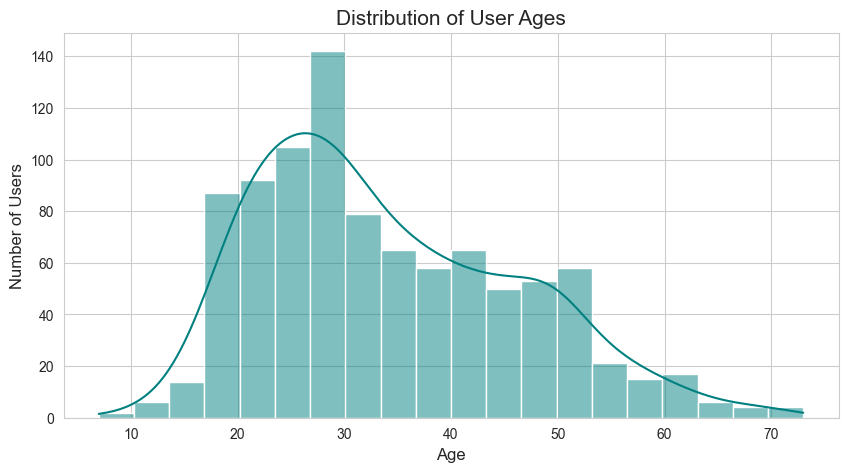

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# 3. Create the Histogram
# We drop duplicates because 'data2' has many rows per user (one for each rating).
# We only want to count each user's age ONCE.
unique_users = data2.drop_duplicates(subset=['user_id'])

sns.histplot(unique_users['age'], bins=20, kde=True, color='teal')

plt.title('Distribution of User Ages', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# 5. Show the plot
plt.show()

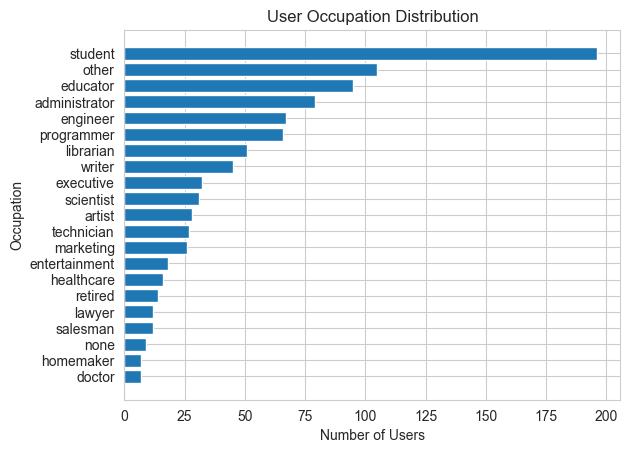

In [61]:
unique_users = data2.drop_duplicates(subset=['user_id'])

occupation_data = unique_users['occupation'].value_counts()
y_data = occupation_data.sort_values(ascending=True)

plt.barh(y_data.index, y_data.values)

plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.title('User Occupation Distribution')

plt.show()

<BarContainer object of 2 artists>

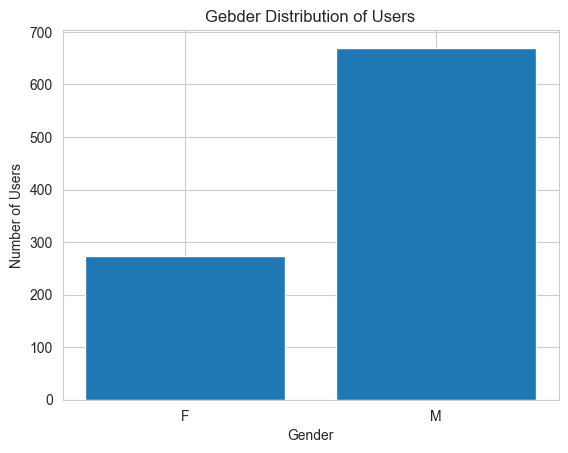

In [67]:
data2
unique_users = data2.drop_duplicates(subset=['user_id'])
gender_data=unique_users['gender'].value_counts().sort_values(ascending=True)

plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Gebder Distribution of Users')

plt.bar(gender_data.index, gender_data.values)